In [1]:
#Employee Turnover Analytics

In [6]:
# 1. Data Quality Checks
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\Dell\\Downloads\\HR_Comma_Sep.csv')

# Check for missing values
print(data.isnull().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


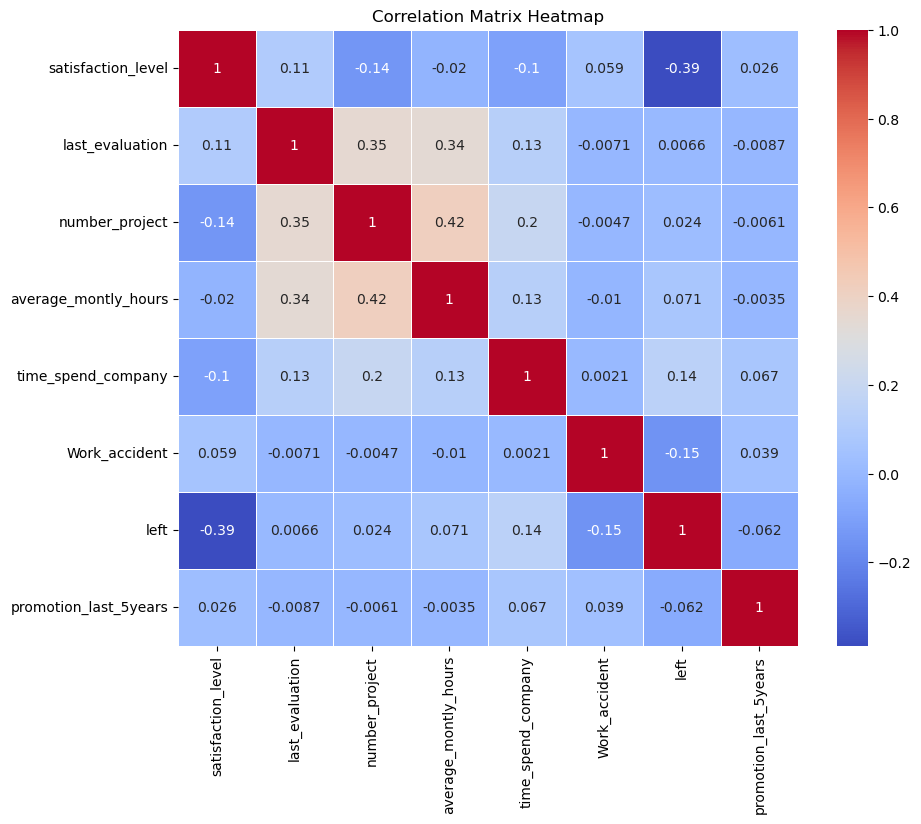

In [8]:
# 2. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_552\2001599576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['satisfaction_level'], bins=30)


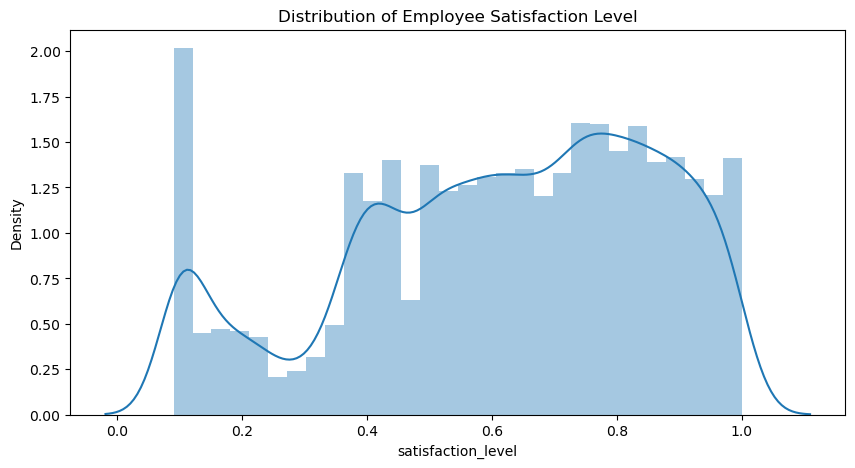

C:\Users\Dell\AppData\Local\Temp\ipykernel_552\2001599576.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['last_evaluation'], bins=30)


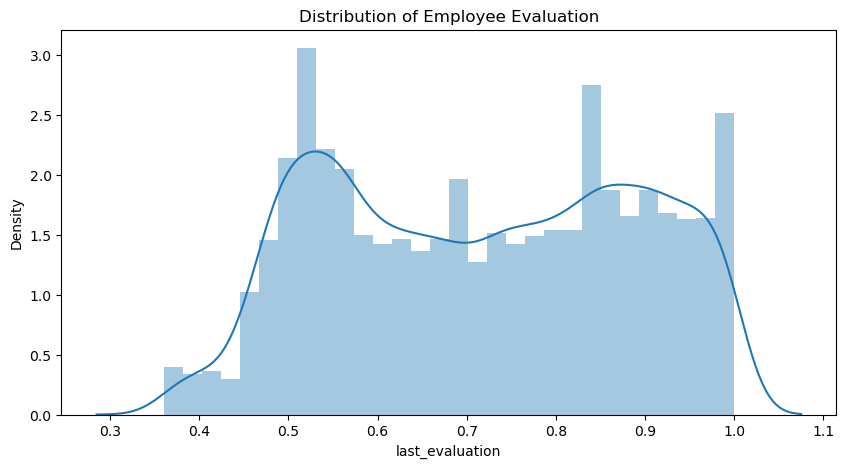

C:\Users\Dell\AppData\Local\Temp\ipykernel_552\2001599576.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_montly_hours'], bins=30)


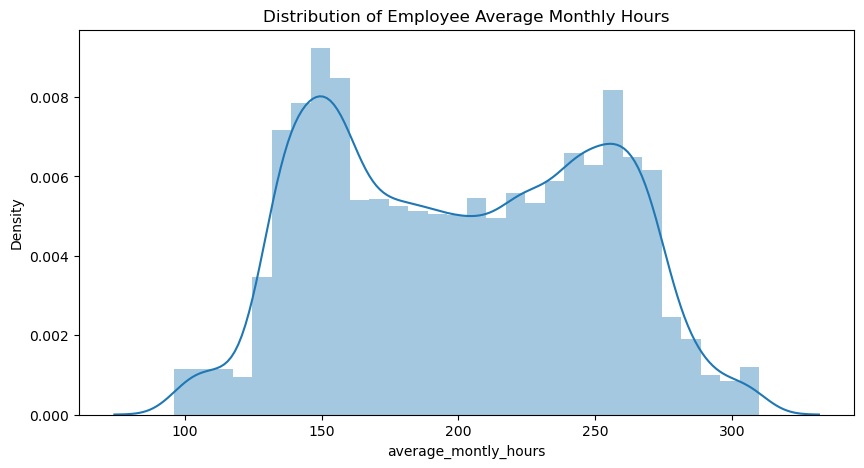

In [9]:
# Distribution of satisfaction_level
plt.figure(figsize=(10, 5))
sns.distplot(data['satisfaction_level'], bins=30)
plt.title('Distribution of Employee Satisfaction Level')
plt.show()

# Distribution of last_evaluation
plt.figure(figsize=(10, 5))
sns.distplot(data['last_evaluation'], bins=30)
plt.title('Distribution of Employee Evaluation')
plt.show()

# Distribution of average_montly_hours
plt.figure(figsize=(10, 5))
sns.distplot(data['average_montly_hours'], bins=30)
plt.title('Distribution of Employee Average Monthly Hours')
plt.show()


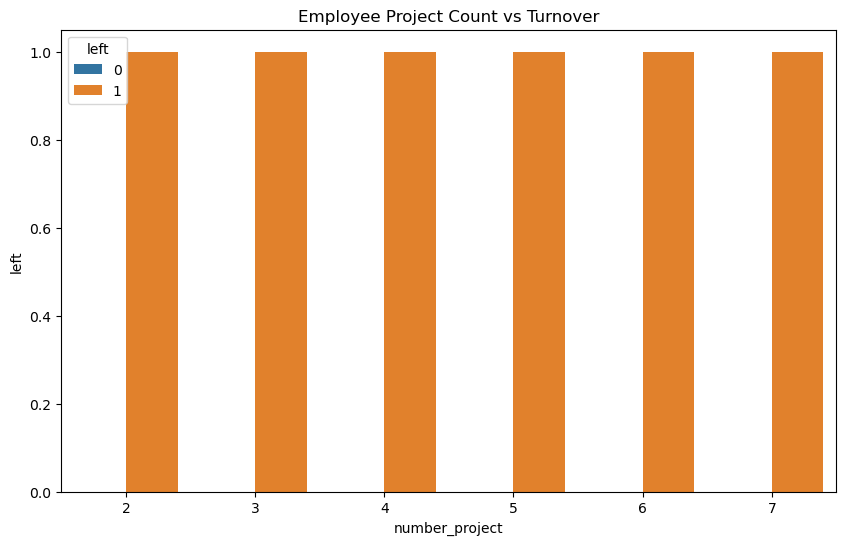

In [10]:
# Bar plot for project count with respect to employee turnover
plt.figure(figsize=(10, 6))
sns.barplot(x='number_project', y='left', hue='left', data=data)
plt.title('Employee Project Count vs Turnover')
plt.show()


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


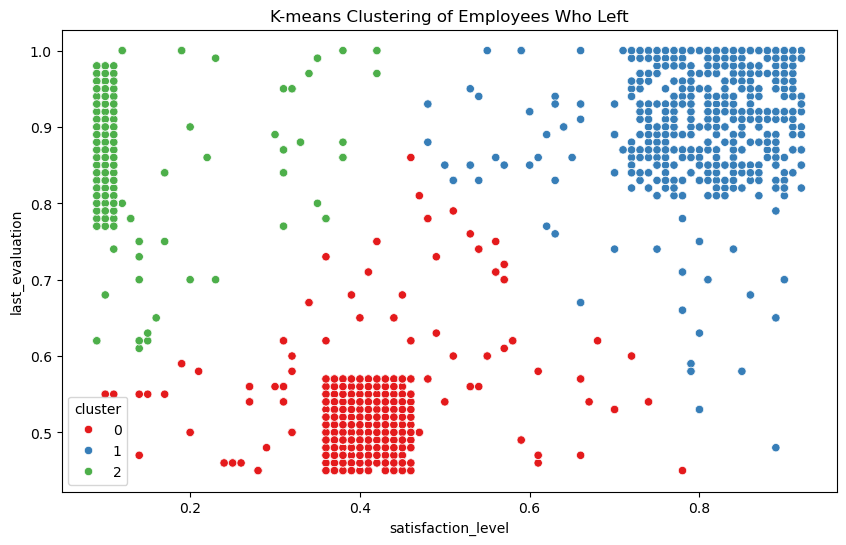

In [11]:
# 3. Clustering for Employee Segmentation
from sklearn.cluster import KMeans
import numpy as np

# Filter data for employees who left
left_employees = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(left_employees)
left_employees['cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='Set1')
plt.title('K-means Clustering of Employees Who Left')
plt.show()


In [16]:
# 4. Handling Class Imbalance Using SMOTE
# Print the column names to verify
print(data.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Convert categorical variables to numeric
data_dummies = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

# Separate features and target variable
X = data_dummies.drop('left', axis=1)
y = data_dummies['left']

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [23]:
#5. Model Training and Cross-Validation
# Logistic Regression, Random Forest, Gradient Boosting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train_sm, y_train_sm, cv=5)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train_sm, y_train_sm, cv=5)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train_sm, y_train_sm, cv=5)
gb.fit(X_train_sm, y_train_sm)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83      2286
           1       0.50      0.75      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.76      0.77      3000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.93      0.93      0.93       714

    accuracy                           0.97      3000
   m

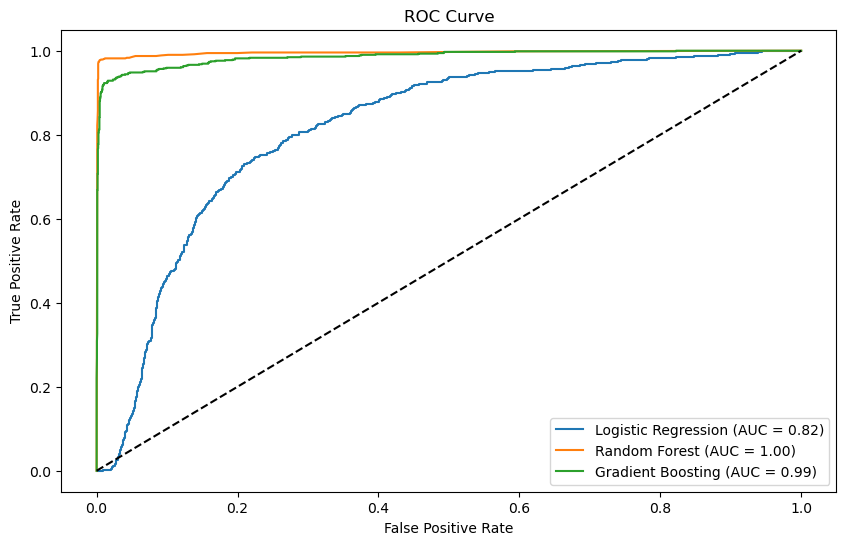

[[2274   12]
 [  16  698]]


In [24]:
# 6. Identify the Best Model
# ROC Curve and Confusion Matrix

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# ROC Curve and AUC for Logistic Regression
y_prob_lr = lr.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# ROC Curve and AUC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# ROC Curve and AUC for Gradient Boosting
y_prob_gb = gb.predict_proba(X_test)[:,1]
gb_auc = roc_auc_score(y_test, y_prob_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Assuming Random Forest performed best
print(conf_matrix)


In [25]:
# 7. Suggest Retention Strategies
# Predict turnover probabilities
y_prob_best = rf.predict_proba(X_test)[:, 1]  # Using Random Forest as the best model

# Classify employees into risk zones
safe_zone = y_prob_best < 0.2
low_risk_zone = (y_prob_best >= 0.2) & (y_prob_best < 0.6)
medium_risk_zone = (y_prob_best >= 0.6) & (y_prob_best < 0.9)
high_risk_zone = y_prob_best >= 0.9

# Number of employees in each zone
print("Safe Zone Employees:", safe_zone.sum())
print("Low-Risk Zone Employees:", low_risk_zone.sum())
print("Medium-Risk Zone Employees:", medium_risk_zone.sum())
print("High-Risk Zone Employees:", high_risk_zone.sum())

# Suggestion for retention strategies
print("For high-risk zone employees: Immediate action is needed such as increasing job satisfaction, reducing workload, or offering promotions.")


Safe Zone Employees: 2169
Low-Risk Zone Employees: 125
Medium-Risk Zone Employees: 53
High-Risk Zone Employees: 653
For high-risk zone employees: Immediate action is needed such as increasing job satisfaction, reducing workload, or offering promotions.
